In [1]:
import math
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Assumptions

In [21]:
rho_w = 1000 # density of water [kg/m^3]

rho_cc = 2850 # density of continental crust [kg/m^3]
rho_cm = 3338 # density of continental lithospheric mantle [kg/m^3]
cc = 35000 # thickness of continental crust layer 
cm = 200000 # thickness of continental  mantle

rho_oc = 2900 # density of oceanic crust
rho_om = 3300 # density of depleted oceanic lithospheric mantle
oc = 7000 # thickness of oceanic crust layer 
om = 50000 # thickness of depleted oceanic lithospheric mantle

rho_m = 3300 # density of asthenospheric mantle
compensation_depth = cc + cm # compensation depth
m = compensation_depth - oc - om # thickness of the asthenospheric mantle [m]

g = 9.81

initial_depth = 0
depth_increment = 1000
final_depth = compensation_depth+depth_increment
z = np.array(range(initial_depth,final_depth,depth_increment)) # depth [m]

## Lithostatic pressure for the continental lithosphere
$$P = \int_{a}^{b} \rho(z) g dz$$

In [22]:
# w: depth of water layer
# cc: thickness of continental crust
def calc_pressure_continent(z, w, c):
    P = np.array([0]*len(z))
    for i, val in enumerate(z):
        if abs(val) <= w:
            # integrate the density over the water layer
            y, err = integrate.quad(lambda z: rho_w*g,0,val)
        elif w < abs(val) <= w + c:
            #print(y/1e6)
            # integrate the density over the crustal layer,
            # plus the total pressure from the water layer
            y, err = integrate.quad(lambda z: rho_cc*g,w,val)
            y+= rho_w*g*w
        elif w + c <= abs(val) <= w + c + cm:
            # integrate the density over the continental lithospheric mantle layer,
            # plus the total pressure from the water + crustal layer
            y, err = integrate.quad(lambda z: rho_cm*g,w+c,val)
            y+= rho_w*g*w + rho_cc*g*c
        else:
            # integrate the density over the mantle layer,
            # plus the total pressure from the water + crustal + cm layer
            y, err = integrate.quad(lambda z: rho_m*g,w+c+cm,val)
            y+= rho_w*g*w + rho_cc*g*c + rho_cm*g*cm
        P[i] = y/1e6
    return P

First, I vary the thickness of the continental crust between 30 to 50 km. I assume that everything is under water, with a water layer of 2 km.

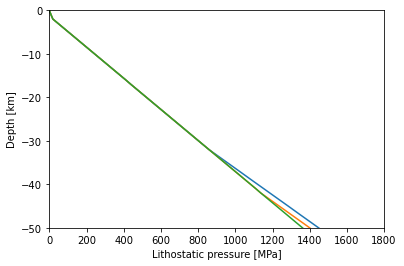

In [23]:
cc_range = list(range(30000,60000,10000))
w_A = 2000 # thickness of water layer [m]
plt.figure(2)
for i in cc_range:
        P = calc_pressure_continent(z, w_A, i)
        plt.plot(P,[-j/1000 for j in z])
plt.ylim((-50,0))
plt.xlim((0,1800))
plt.xlabel('Lithostatic pressure [MPa]')
plt.ylabel('Depth [km]')
plt.show()

Blue = 30 km

Orange = 40 km

Green = 50 km

Doesn't look like there's much difference???

## Lithostatic pressure for the oceanic lithosphere

In [5]:
def calc_pressure_ocean(z,w,c):
    P = np.array([0]*len(z))
    for i, val in enumerate(z):
        if abs(val) <= w:
            y, err = integrate.quad(lambda z: rho_w*g,0,val)
        elif w < abs(val) <= w+c:
            y, err = integrate.quad(lambda z: rho_oc*g,w,val)
            y+= rho_w*g*w
        elif w+oc < abs(val) <= w+c+om:
            y, err = integrate.quad(lambda z: rho_om*g,w+c,val)
            y+= rho_w*g*w + rho_oc*g*c
        else:
            y, err = integrate.quad(lambda z: rho_m*g,w+om+c,val)
            y+= rho_w*g*w + rho_oc*g*c + rho_om*g*om
        P[i] = y/1e6
    return P

In [18]:
w_B = 5000 # thickness of water layer [m]

For the oceanic layer, I assume that there is 5 km of water above.

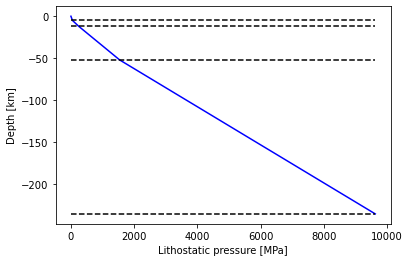

In [6]:
P_B = calc_pressure_ocean(z,w_B,oc)
plt.figure(3)
plt.plot(P_B,[-i/1000 for i in z],'b-')

plt.plot(P_B, [-(w_B)/1000]*len(z),'k--')
plt.plot(P_B, [-(oc+w_B)/1000]*len(z),'k--')
plt.plot(P_B, [-(oc+w_B+om)/1000]*len(z),'k--')
plt.plot(P_B, [-(oc+w_B+om+m)/1000]*len(z),'k--')

#plt.ylim((-100,0))
#plt.xlim((0,5000))
plt.xlabel('Lithostatic pressure [MPa]')
plt.ylabel('Depth [km]')
plt.show()

The uppermost dashed line is where the oceanic crust begins. The second dashed line is where the depleted oceanic lithospheric mantle begins, and the third dashed line is where the asthenospheric mantle begins.

### Measuring the pressure difference
Assuming a crustal depth of 35 km, I compare the lithostatic pressure for the continental and oceanic lithosphere on the same plot.

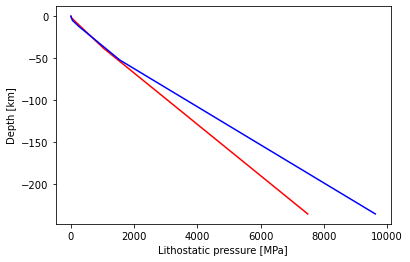

In [7]:
P_A = calc_pressure_continent(z, w_A, cc)
P_B = calc_pressure_ocean(z, w_B, oc)
plt.figure(4)
plt.plot(P_A,[-j/1000 for j in z],'r')
plt.plot(P_B,[-j/1000 for j in z],'b')
plt.xlabel('Lithostatic pressure [MPa]')
plt.ylabel('Depth [km]')
plt.show()

Red is continental, blue is oceanic.
Zooming in...

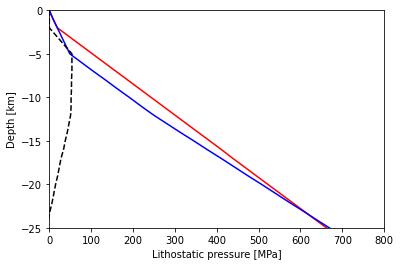

54

In [8]:
plt.plot(P_A,[-j/1000 for j in z],'r')
plt.plot(P_B,[-j/1000 for j in z],'b')
plt.plot(P_A-P_B,[-j/1000 for j in z],'k--')
plt.xlim((0,800))
plt.ylim((-25,0))
plt.xlabel('Lithostatic pressure [MPa]')
plt.ylabel('Depth [km]')
plt.show()
np.amax(P_A-P_B)

Dotted black line is the pressure difference.

In the upper crust, the maximum pressure difference is 54 MPa. Not sure what is happening beneath the comensation depth. (pressure not supported beneath the compensation depth???)

In [9]:
P_diff = P_A - P_B
comp_depth = np.where(P_diff == np.min(P_diff[P_diff > 0]))
int(comp_depth[0])

23

If the compensation depth is defined as where $P_{continental} = P_{oceanic}$, then it is ~23 km in this case.

## Isostatic balancing
Isostatic balance equation (assume sea level = 0):

$$\rho_w w_B + \rho_{oc} d_{oc} + \rho_{om} d_{om} + \rho_m d_m = \rho_w w_A + \rho_{cc} d_{cc} + \rho_{cm} d_{cm}$$

where $\rho$ is the density of water, oceanic crust, (depleted) oceanic mantle, (asthenospheric) mantle, continental crust, etc.

$w_B$ is the thickness of the water layer above the oceanic lithosphere, and $w_A$ is the thickness of the water layer above the continental lithosphere.

$d$ is the thickness of the oceanic crust, continental crust, etc.

The compensation depth is taken as the base of the continental lithospheric mantle, which determines the depth of the asthenospheric manle ($d_m$).

Solving for the thickness of the continental crust assuming that the oceanic lithosphere is 5 km under water and the continental lithosphere is 2 km under water.

In [10]:
cc_calc = (rho_w*w_B + rho_oc*oc + rho_om*om + rho_m*(m-w_B) - rho_w*w_A - rho_cm*cm)/rho_cc
print(cc_calc/1000)

109.05263157894737


This says continental crust should be 109 km??? That's so thick??????

Anyway, assuming this is correct... I check to see if P_A = P_B at the base of the continental lithospheric mantle when the crustal thickness is 117 km.

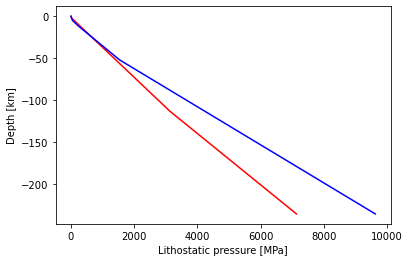

In [11]:
P_A = calc_pressure_continent(z, w_A, cc_calc)
P_B = calc_pressure_ocean(z, w_B, oc)
plt.plot(P_A,[-j/1000 for j in z],'r')
plt.plot(P_B,[-j/1000 for j in z],'b')
plt.xlabel('Lithostatic pressure [MPa]')
plt.ylabel('Depth [km]')
plt.show()

In [12]:
(rho_w*g*w_B + rho_oc*g*oc + rho_om*g*om + rho_m*g*m)/1e6

9621.648

In [13]:
(rho_w*g*w_A + rho_cc*g*cc_calc + rho_cm*g*cm)/1e6

9621.648

In [14]:
P_A

array([   0,    9,   19,   47,   75,  103,  131,  159,  187,  215,  243,
        271,  299,  327,  355,  383,  411,  438,  466,  494,  522,  550,
        578,  606,  634,  662,  690,  718,  746,  774,  802,  830,  858,
        886,  914,  942,  970,  998, 1026, 1054, 1082, 1110, 1137, 1165,
       1193, 1221, 1249, 1277, 1305, 1333, 1361, 1389, 1417, 1445, 1473,
       1501, 1529, 1557, 1585, 1613, 1641, 1669, 1697, 1725, 1753, 1781,
       1808, 1836, 1864, 1892, 1920, 1948, 1976, 2004, 2032, 2060, 2088,
       2116, 2144, 2172, 2200, 2228, 2256, 2284, 2312, 2340, 2368, 2396,
       2424, 2452, 2479, 2507, 2535, 2563, 2591, 2619, 2647, 2675, 2703,
       2731, 2759, 2787, 2815, 2843, 2871, 2899, 2927, 2955, 2983, 3011,
       3039, 3067, 3099, 3132, 3165, 3197, 3230, 3263, 3296, 3328, 3361,
       3394, 3427, 3460, 3492, 3525, 3558, 3591, 3623, 3656, 3689, 3722,
       3754, 3787, 3820, 3853, 3885, 3918, 3951, 3984, 4017, 4049, 4082,
       4115, 4148, 4180, 4213, 4246, 4279, 4311, 43

In [15]:
P_B

array([   0,    9,   19,   29,   39,   49,   77,  105,  134,  162,  191,
        219,  248,  280,  312,  345,  377,  410,  442,  474,  507,  539,
        571,  604,  636,  669,  701,  733,  766,  798,  830,  863,  895,
        928,  960,  992, 1025, 1057, 1089, 1122, 1154, 1187, 1219, 1251,
       1284, 1316, 1348, 1381, 1413, 1445, 1478, 1510, 1543, 1587, 1631,
       1675, 1719, 1763, 1807, 1852, 1896, 1940, 1984, 2028, 2072, 2116,
       2161, 2205, 2249, 2293, 2337, 2381, 2426, 2470, 2514, 2558, 2602,
       2646, 2690, 2735, 2779, 2823, 2867, 2911, 2955, 2999, 3044, 3088,
       3132, 3176, 3220, 3264, 3308, 3353, 3397, 3441, 3485, 3529, 3573,
       3617, 3662, 3706, 3750, 3794, 3838, 3882, 3926, 3971, 4015, 4059,
       4103, 4147, 4191, 4235, 4280, 4324, 4368, 4412, 4456, 4500, 4544,
       4589, 4633, 4677, 4721, 4765, 4809, 4853, 4898, 4942, 4986, 5030,
       5074, 5118, 5163, 5207, 5251, 5295, 5339, 5383, 5427, 5472, 5516,
       5560, 5604, 5648, 5692, 5736, 5781, 5825, 58

## Calculating the geotherm
Values and equations from
https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/RG018i001p00269

In [16]:
def calc_geotherm(z):
    k_1 = 2.5 # Thermal conductivity of the crustal layer [W/mK] (assume constant)
    k_2 = 3.4 # Thermal conductivity of the upper mantle
    D = 10000 # Depth of upper crust producing radioactive heat [m]
    T_0 = 273 # surface temperature [K]
    Q_0 = 0.046 # Surface heat flow [W/m2]
    Q_r = 0.025 # Nonradiogenic heat flow [W/m2]
    A_0 = (Q_0 - Q_r)/D # Surface heat production [W/m3]
    T = np.ones(len(z))
    
    # index of end of crustal layer
    i = int(np.where(z==cc)[0])
    
    # temperature within the crust 
    for j, val in enumerate(z[:i]):
        T[j] = T_0 + (Q_r*val)/k_1 + ((D**2*A_0)/k_1)*(1-np.exp(-val/D))
    # temperature below the crust
    for m, val in enumerate(z[i:]):
        T[m+j+1] = T[j] + ((val-cc)/k_2)*Q_r
    return T


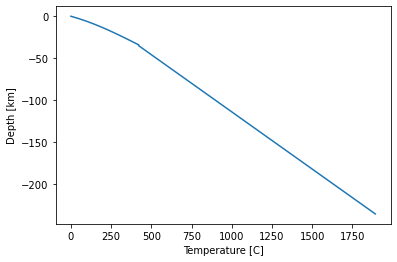

In [17]:
T = calc_geotherm(z)
plt.figure(1)
plt.plot(T-273,[-i/1000 for i in z])
plt.xlabel('Temperature [C]')
plt.ylabel('Depth [km]')
plt.show()